In [102]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
warnings.filterwarnings("ignore")

%matplotlib inline

In [103]:
data = pd.read_excel("Student-Employability-Datasets.xlsx")

renamed_columns = {"Name of Student" : "Name_of_student", 
                   "SELF-CONFIDENCE" : "Self_confidence",
                   "PHYSICAL CONDITION" : "Physical_condition", 
                   "GENERAL APPEARANCE" : "General_appearance", 
                   "MANNER OF SPEAKING" : "Manner_of_speaking", 
                   "MENTAL ALERTNESS" : "Mental_alertness", 
                   "ABILITY TO PRESENT IDEAS" : "Ability_to_present_ideas", 
                   "COMMUNICATION SKILLS" : "Communication_skills",
                   "Student Performance Rating" : "Student_performance_rating",
                   "CLASS" : "Employable"}

data.rename(columns = renamed_columns, inplace=True)
data.drop(columns = "Name_of_student", inplace=True, axis=1)

# Classify an employable student as 1 and a less-employable student as 0
data.replace("Employable", 1, inplace=True)
data.replace("LessEmployable", 0, inplace=True)

data.head()

,General_appearance,Manner_of_speaking,Physical_condition,Mental_alertness,Self_confidence,Ability_to_present_ideas,Communication_skills,Student_performance_rating,Employable
0,4,5,4,5,5,5,5,5,1
1,4,4,4,4,4,4,3,5,1
2,4,3,3,3,3,3,2,5,0
3,3,3,3,2,3,3,3,5,0
4,4,4,3,3,4,4,3,5,1


In [104]:
# Extract features and labels
features = data.drop("Employable", axis=1).values
labels = data["Employable"].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [105]:
# Create and train the logistic regression model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

Accuracy: 0.91
Precision: 0.93
Recall: 0.91
F1-score: 0.92


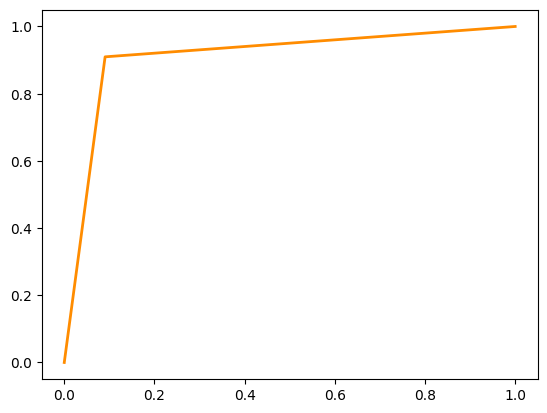

In [106]:
# Predictions using the trained model
predictions = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Calculate ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate) # area under ROC curve

# Plot ROC curve
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

In [107]:
# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[241  24]
 [ 30 302]]
